<a href="https://colab.research.google.com/github/soueuwilliam/Estudos-R/blob/main/Estudos-R%20/IBS/Aulas/redeR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Coloque o caminho do arquivo R para lê
caminho_arquivo_r <- '/content/reder.R'

arquivo <- readLines(caminho_arquivo_r)

writeLines(arquivo)



In [2]:
# Carregar o caminho do BioCmanger
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

# Aula - RedeR

In [6]:
# Esta aula é baseada na vinheta do pacote RedeR, que pode ser encontrada em:
# https://bioconductor.org/packages/release/bioc/vignettes/RedeR/inst/doc/RedeR.html

# Instalar os seguintes pacotes, caso eles não estejam instalados: igraph, RedeR
# if(!require("igraph")) install.packages("igraph")
# if(!require("RedeR")) BiocManager::install("RedeR")

# Teste william -----------------
if (!require("igraph")) BiocManager::install("igraph")
if(!require("RedeR")) BiocManager::install("RedeR")
# Fim do teste William ----------

# Carregar os pacotes:
library(igraph)
library(RedeR)


# IGRAPH

In [18]:

# Ler tabela de interações e remover as interações duplicadas
int <- read.table("/content/string_interactions.tsv", header = T, comment.char = "", stringsAsFactors = F)
idx <- !duplicated(t(apply(int, 1, sort)))
int <- as.matrix(int[idx, 1:2])

# Criclass(g)ar grafo
g <- graph_from_edgelist(int, directed = F)


[1] "igraph"

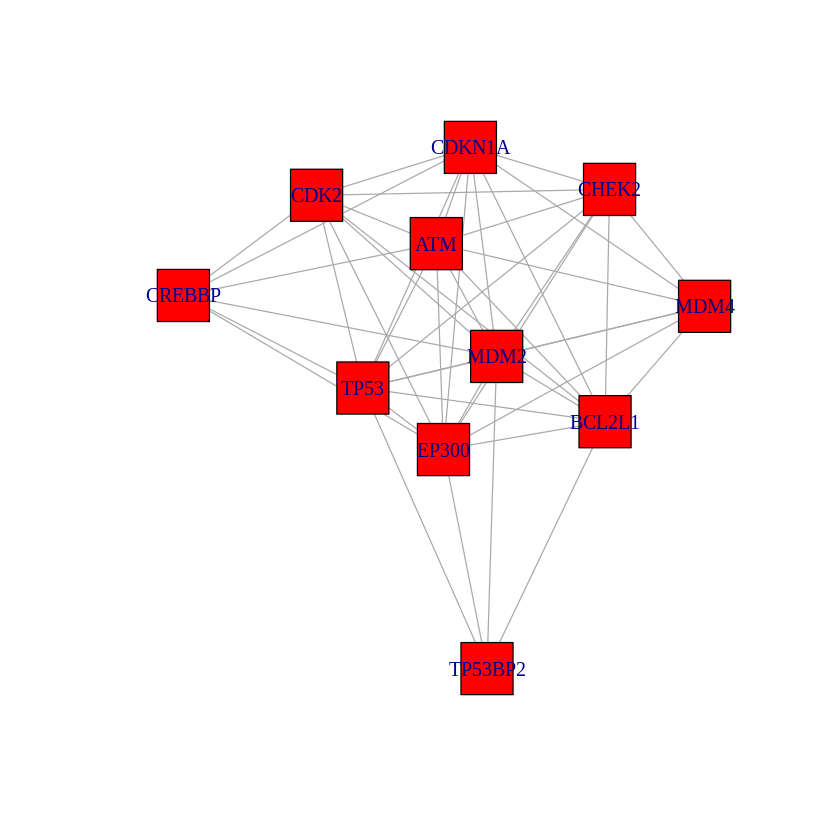

ATM    MDM2  CREBBP   EP300    CDK2    TP53  BCL2L1  CDKN1A    MDM4   CHEK2 
      9      10       6      10       8      10       9       9       7       8 
TP53BP2 
      4

ATM      MDM2    CREBBP     EP300      CDK2      TP53    BCL2L1    CDKN1A 
0.6761905 2.2595238 0.0000000 2.2595238 0.3333333 2.2595238 1.3928571 0.6761905 
     MDM4     CHEK2   TP53BP2 
0.0000000 0.1428571 0.0000000

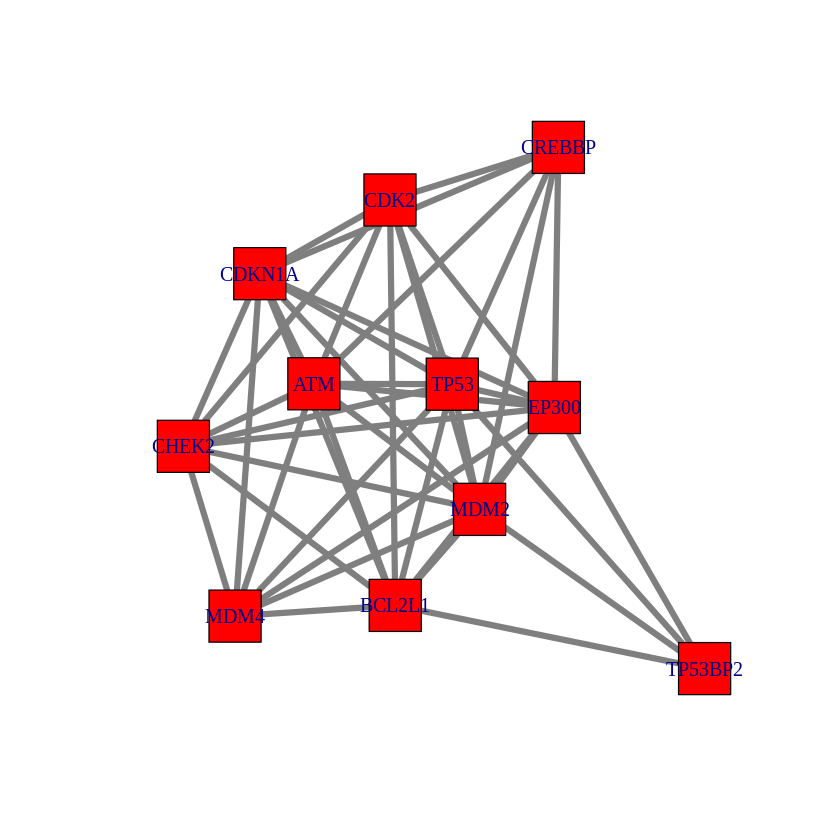

In [9]:

# Atributos dos vértices:
# name, size, shape
V(g)$size <- 20
V(g)$shape <- "square" # a partir de shape()
V(g)$color <- "red"
plot(g)

# Atributos das arestas:
E(g)$width <- 5
E(g)$color <- "grey50"
plot(g)

# Grau do nó e centralidade
degree(g)
betweenness(g)


# RedeR

In [ ]:
## Inicializando a interface ----
# Abrir a porta para a interface R-Java
rdp <- RedPort()

# Inicializar a interface
calld(rdp)

## Visualizando grafos -----

# Criando um grafo retangular
g1 <- graph.lattice(c(3,3,3))
addGraph(rdp, g = g1, layout = layout_with_kk(g1))

# Obtendo o grafo da interface
g2 <- getGraph(rdp)
summary(g2)

# Deletando todos os grafos da interface:
resetd(rdp)

# Visualizando a rede PPI inicial no RedeR
g <- graph_from_edgelist(int, directed = F)
addGraph(rdp, g = g)


## Modificar atributos do grafo por linha de comando ----

# O RedeR determina alguns atributos do grafo que podem ser modificados na
# visualização. Para verificar a lista completa destes atributos, veja:
# https://bioconductor.org/packages/release/bioc/vignettes/RedeR/inst/doc/RedeR.html#tab:tab1

# Modificar cor de fundo
g1$bgColor <- 'grey90'

# Setar alguns atributos dos nós:
V(g1)$nodeColor <- "skyblue"
V(g1)$nodeSize <- 50
V(g1)$name <- paste0("V",1:vcount(g1))

# Setar alguns atributos das arestas:
E(g1)$edgeColor <- "skyblue"
E(g1)$edgeWidth <- 10

addGraph(rdp, g1)

# As modificações de atributos também podem ser feitas pelas funções 'att.addv' e 'att.adde':
# Modificar atributos de nós (att.addv)
g1 <-  att.addv(g1, to = "nodeFontSize", value = 20)
g1 <- att.addv(g1, to = "nodeFontSize", value = 70,
               filter = list("name" = V(g1)$name[1:3]))

# Modificar atributos de arestas (att.adde)
g1 <-  att.adde(g1, to = "edgeType", value = "DOTTED")


# EXEMPLO - INTERATOMA HUMANO

In [ ]:
# O objeto 'ER.limma' é um data.frame contendo o resultado de uma análise de expressão diferencial de células
# mamárias, considerando 4 tempos diferentes: 0 horas, 3 horas, 6 horas e 12 horas.
# O objeto 'hs.inter' é um objeto igraph correspondente à rede PPI humana.

data(ER.limma)
data(hs.inter)

# Usaremos as informações da análise de expressão diferencial para construirmos subredes:

# Construir uma rede PPI (a partir da rede completa hs.inter) para os genes diferencialmente
# expressos na comparação 3h-0h.
gt3  <- subg(g=hs.inter, dat=ER.limma[ER.limma$degenes.t3!=0,], refcol=1)

# Setar atributos
gt3  <- att.setv(g=gt3, from="Symbol", to="nodeAlias")
gt3  <- att.setv(g=gt3, from="logFC.t3", to="nodeColor", breaks=seq(-2,2,0.4), pal=2)

# Construir uma rede PPI (a partir da rede completa hs.inter) para os genes diferencialmente
# expressos na comparação 6h-0h.
gt6  <- subg(g=hs.inter, dat=ER.limma[ER.limma$degenes.t6!=0,], refcol=1)

# Setar atributos
gt6  <- att.setv(g=gt6, from="Symbol", to="nodeAlias")
gt6  <- att.setv(g=gt6, from="logFC.t6", to="nodeColor", breaks=seq(-2,2,0.4), pal=2)

# Construir uma rede PPI (a partir da rede completa hs.inter) para os genes diferencialmente
# expressos na comparação 12h-0h.
gt12  <- subg(g=hs.inter, dat=ER.limma[ER.limma$degenes.t12!=0,], refcol=1)

# Setar atributos
gt12  <- att.setv(g=gt12, from="Symbol", to="nodeAlias")
gt12  <- att.setv(g=gt12, from="logFC.t12", to="nodeColor", breaks=seq(-2,2,0.4), pal=2)

# Customizar os nomes dos subgrafos:
gt3$nestAlias <- "3h"
gt6$nestAlias <- "6h"
gt12$nestAlias <- "12h"

# Mandar os grafos aninhados para a interface
N1 <- addGraph(rdp, gt3, gcoord=c(10,25), gscale=20, isNest=TRUE, theme='tm1', zoom=30)
N2 <- addGraph(rdp, gt6, gcoord=c(20,70), gscale=50, isNest=TRUE, theme='tm1', zoom=30)
N3 <- addGraph(rdp, gt12, gcoord=c(70,55), gscale=80, isNest=TRUE, theme='tm1', zoom=30)

# Aninhar os sub-subgrafos
N4 <- nestNodes(rdp, nodes=V(gt3)$name, parent=N2, theme='tm2')
N5 <- nestNodes(rdp, nodes=V(gt6)$name, parent=N3, theme='tm2')
N6 <- nestNodes(rdp, nodes=V(gt3)$name, parent=N5, theme='tm3')

# Fundir as arestas entre os ninhos
mergeOutEdges(rdp, nlev=2)

# Relaxar a rede
relax(rdp, p1=100, p2=100, p3=5, p4=150, p5=5, p8=10, p9=20)

# Adicionar a legenda
scl <- gt3$legNodeColor$scale
leg <- gt3$legNodeColor$legend
addLegend.color(rdp, colvec=scl, labvec=leg, title="Node color (logFC)")